## Ejercicio 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [7]:
data_schools = pd.read_excel('data_schools.xlsx')
display(data_schools.head())

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09


In [9]:
X = data_schools[["LSAT"]]
Y = data_schools[["GPA"]]
regresion = linear_model.LinearRegression()
reg = regresion.fit(X, Y)

In [10]:
#Intercepto
beta_0 = regresion.intercept_

#Coef
beta_1 = regresion.coef_

In [11]:
Y_pred = regresion.predict(X).reshape(-1)

In [12]:
X = X.to_numpy().reshape(-1)
Y_real= Y.to_numpy()
Y_real= Y_real.reshape(-1)

In [13]:
residual = Y_real - Y_pred

In [14]:
n = len(Y_real)
den = sum((X-np.mean(X))**2)
num=sum(residual**2)/(n-2)
error=np.sqrt(num/den)

In [15]:
def ds_bootstrap(n):
    regresion = linear_model.LinearRegression()
    error_boost = np.array([ ])
    
    for i in range(0,n):
        random = np.random.choice(data_schools['escuela'], len(data_schools['escuela']), replace = True)
        
        
        df_aux =  pd.DataFrame(random, columns=['escuela'])
        muestra = pd.merge(df_aux, data_schools, how="inner", on=["escuela"])

        
        X_1 = muestra[["LSAT"]]
        Y_1 = muestra[["GPA"]]
        reg = regresion.fit(X_1, Y_1)
        Y_pred = regresion.predict(X_1).reshape(-1)

        Y_real= Y_1.to_numpy().reshape(-1)
        X_1 = X_1.to_numpy().reshape(-1)
        
        df_aux1 = pd.DataFrame(X_1, columns=['LSAT'])

        #Estimacion
        residuales = Y_real - Y_pred

        #error estandar
        x_j=df_aux1[["LSAT"]].to_numpy().reshape(-1)
        den=sum((x_j-np.mean(x_j))**2)
        num= sum(residuales**2)/(n)
        err=np.sqrt(num/den)
        err
        
        err=np.sqrt(num/den)
        error_boost = np.append(error_boost, err)
        

    df = pd.DataFrame(error_boost, columns = ['Errores'])
        
        
    
    return(df)

In [22]:
df = ds_bootstrap(1000)



In [ ]:
df_1 = ds_bootstrap(900)

In [19]:
display(df.head())

,Errores
0,0.000103
1,0.000111
2,0.000115
3,0.000088
4,0.000087


Text(0.5, 1.0, 'Histograma de los errores con n-1')

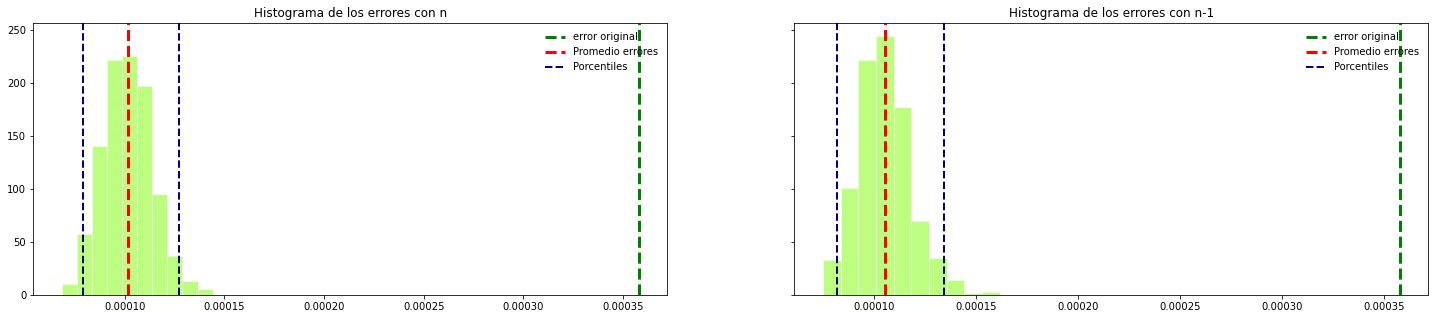

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(25,5))

#Error 1
ax1.hist(df['Errores'],bins=10, alpha=0.5,color = "lawngreen",edgecolor="white")
ax1.axvline(x= error ,color='green', linestyle='--',linewidth=3)
ax1.axvline(x = np.mean(df['Errores']),color='red', linestyle='--',linewidth=3)
ax1.axvline(np.percentile(df['Errores'],2.5),color="navy",linestyle="--",linewidth=2)                                                                                                                                                    
ax1.axvline(np.percentile(df['Errores'],97.5),color="navy",linestyle="--",linewidth=2) 
ax1.legend(['error original','Promedio errores','Porcentiles'], frameon=False, loc=1)
ax1.set_title("Histograma de los errores con n")

#Error2
ax2.hist(df_1['Errores'],bins=10, alpha=0.5,color = "lawngreen",edgecolor="white")
ax2.axvline(x= error ,color='green', linestyle='--',linewidth=3)
ax2.axvline(x = np.mean(df_1['Errores']),color='red', linestyle='--',linewidth=3)
ax2.axvline(np.percentile(df_1['Errores'],2.5),color="navy",linestyle="--",linewidth=2)                                                                                                                                                    
ax2.axvline(np.percentile(df_1['Errores'],97.5),color="navy",linestyle="--",linewidth=2) 
ax2.legend(['error original','Promedio errores','Porcentiles'], frameon=False, loc=1)
ax2.set_title("Histograma de los errores con n-1")

### Nota:
Observemos que el error disminuye cuando se usa bootstrap, y además la muestra es indistinta, ya que se obtienen los mismos resultados